# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve, classification_report

In [2]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [3]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [4]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


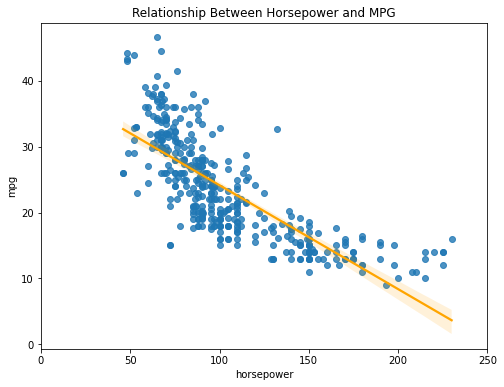

In [5]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [6]:
# call_on_students(1)

#### Answer: 

- Relationship between slope and RSS
- Lowest point on curve us best slpoe -0.158 and RSS less than 9400


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [7]:
# call_on_students(1)

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [8]:
# call_on_students(1)

#### Answer: 

- step size is haw far/large a step to take
- learning rate is the proportion between each steps


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [9]:
# call_on_students(1)

#### Answer: 

- Logistic regression can be used only with two types of target variables: A categorical target variable that has exactly two categories (i.e., a binary or dichotomous variable). A continuous target variable that has values in the range 0.0 to 1.0 representing probability values or proportions.
- Logistic regression is used to predict the class (or category) of individuals based on one or multiple predictor variables (x). It is used to model a binary outcome, that is a variable, which can have only two possible values: 0 or 1, yes or no, diseased or non-diseased.
- Linear regression is used for predicting the continuous dependent variable using a given set of independent features whereas Logistic Regression is used to predict the categorical. Linear regression is used to solve regression problems whereas logistic regression is used to solve classification problems.
- Logistic regression is parametric model: A parametric model is a learner that summarizes data through a collection of parameters.


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [10]:
# call_on_students(1)

#### Answer: 

Pro:
- less prone to overfitting
- more interpretable

Con:
- doesn't handle imbalanced data as well
- doesn't deal with multicolinearity well


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [11]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [12]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [13]:
# call_on_students(1)

In [14]:
# Train-test split
# Set test_size=0.33 and random_state=42

y = mpg_class['target']
X = mpg_class.drop(['target'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)


In [15]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [16]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [17]:
# Code to explore
mpg_class['target'].value_counts()

0    293
1     99
Name: target, dtype: int64

In [18]:
mpg_class['target'].value_counts(normalize=True)

0    0.747449
1    0.252551
Name: target, dtype: float64

#### Answer:

- predict 0 (majority class) will yield ~ 75% accuracy



#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- 


#### Part 3: How accurate would that baseline be on test data?


In [19]:
# Code to find the answer


#### Answer:

- 


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [20]:
# call_on_students(1)

#### Answer:

- SMOTE
- oversample minority class
- undersampling is not recommended due to amount data
- class_weights

- Rule of thumb, 90/10 would be considered as imbalanced data. 

### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [21]:
# call_on_students(1)

In [22]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

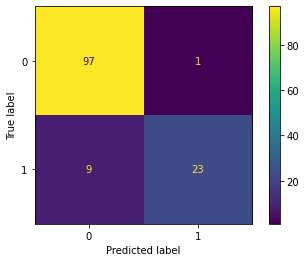

In [23]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_scaled, y_test)

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [24]:
# call_on_students(1)

In [25]:
tp = 23
tn = 97
fp = 1
fn = 9

In [26]:
y_pred = logreg.predict(X_test_scaled)

In [27]:
# Accuracy = (tp+tn) / (tp+tn+fp+fn)
acc = (tp + tn) / (tp + tn + fp + fn)
print(acc)

0.9230769230769231


In [28]:
# Accuracy
accuracy_score(y_test, y_pred)

0.9230769230769231

In [29]:
logreg.score(X_test_scaled,y_test)

0.9230769230769231

In [30]:
# Precision
prec = tp / (tp + fp)
print(prec)

0.9583333333333334


In [31]:
# Precision
precision_score(y_test, y_pred)

0.9583333333333334

In [32]:
# Recall
rec = tp / (tp + fn)
print(rec)

0.71875


In [33]:
# Recall
recall_score(y_test, y_pred)

0.71875

In [34]:
# F1-Score
f1 = 2*prec*rec / (prec + rec)
print(f1)

0.8214285714285714


In [35]:
# F1-Score
f1_score(y_test, y_pred)

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [36]:
# call_on_students(1)

In [37]:
# Calculate roc-auc
y_score = logreg.predict_proba(X_test_scaled)[:,1]

roc_auc_score(y_test, y_score)

0.9811862244897959

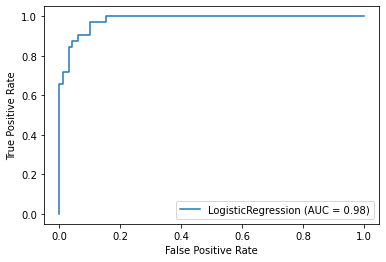

In [38]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test)

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [39]:
# call_on_students(1)

#### Answer:

- The area under the ROC curve (AUC) results were considered excellent for AUC values between 0.9-1, good for AUC values between 0.8-0.9, fair for AUC values between 0.7-0.8, poor for AUC values between 0.6-0.7 and failed for AUC values between 0.5-0.6.


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        98
           1       0.96      0.72      0.82        32

    accuracy                           0.92       130
   macro avg       0.94      0.85      0.89       130
weighted avg       0.93      0.92      0.92       130



## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [41]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

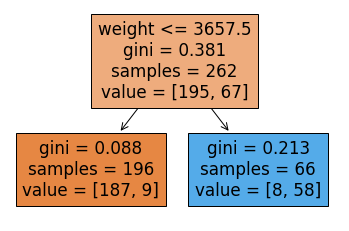

In [42]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

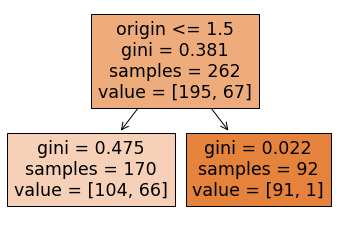

In [43]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [44]:
# call_on_students(1)

#### Answer:

- First tree is better because Gini Impurity scores are better/smaller.


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [45]:
# call_on_students(1)

In [46]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

# DecisionTree is not sensitive to variance so don't need to scale data. 

DecisionTreeClassifier(random_state=42)

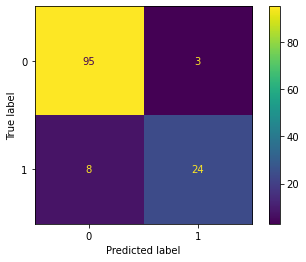

In [47]:
# Plot a confusion matrix on the test data

plot_confusion_matrix(dt, X_test, y_test)

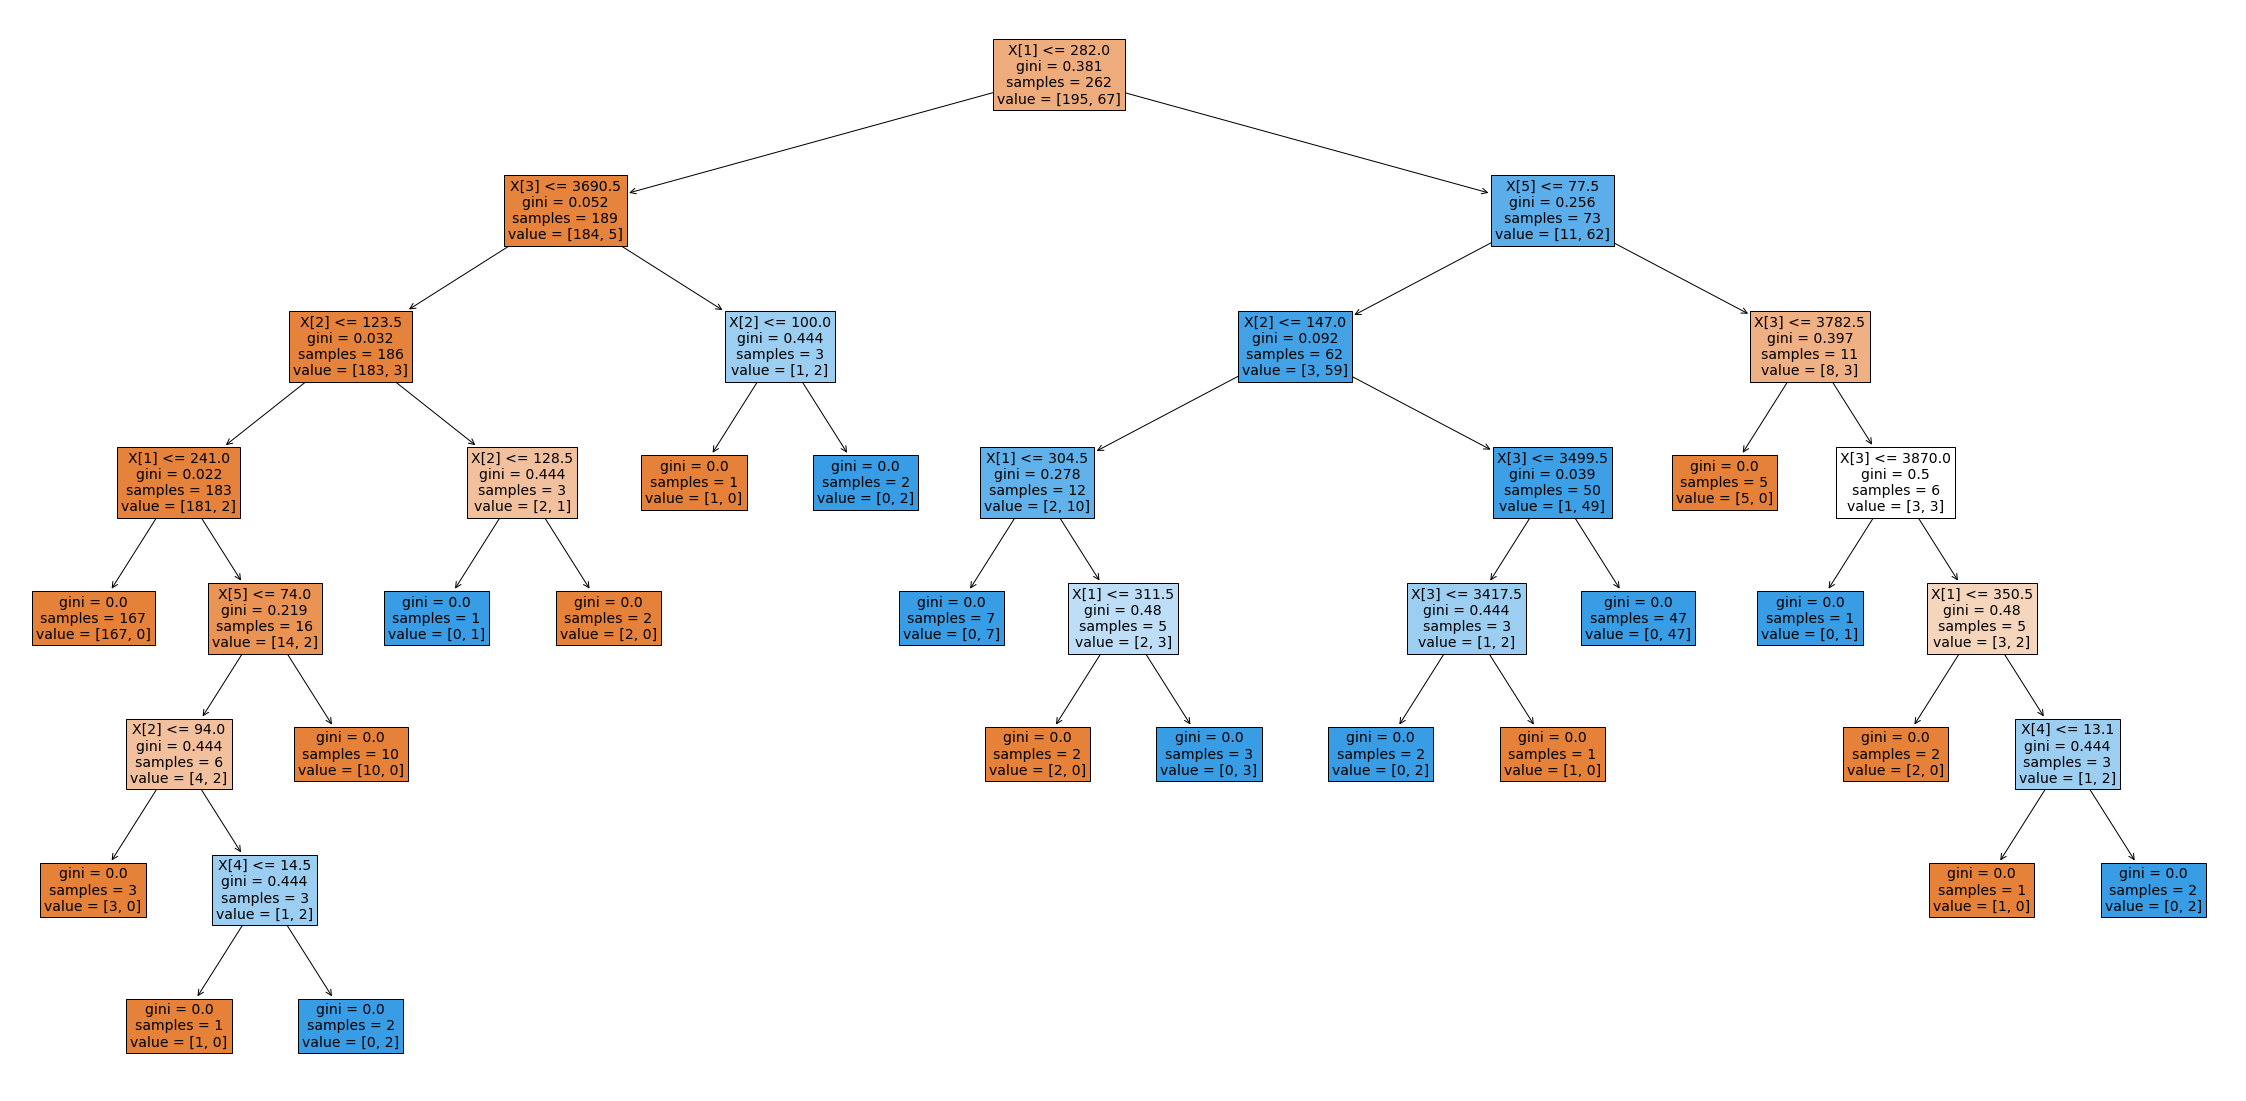

In [48]:

plt.figure(figsize=(40, 20))
plot_tree(dt, filled=True, fontsize=14);

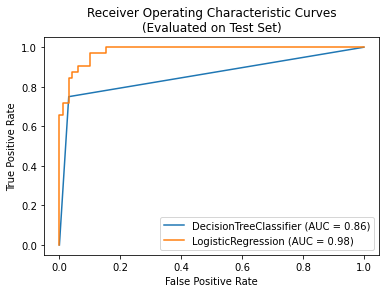

In [49]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [50]:
# call_on_students(1)

#### Answer:

- Logistic regression is better because higher AUC-ROC score.
